In [1]:
# Importing basic required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading and studying the dataset
retail = pd.read_csv("F:\DATA SCIENCE\MACHINE LEARNING\Association Rule Mining and Apriori Algorithm\OnlineRetail.csv",encoding = 'iso-8859-1')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-10 8:26,3.39,17850.0,United Kingdom


In [3]:
# Information of the dataset
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- There are 541909 rows and 8 columns in the dataset
- Description and CustomerID columns has null values present.

In [4]:
# Unique Values in each column of dataset
col = retail.columns
for i in col:
    unique = retail[i].unique()
    no_unique = retail[i].nunique()
    print(f'No. of unique values in {i} column = ',no_unique)
    print(f"Unique Values in the column '{i}' :\n",unique,'\n')

No. of unique values in InvoiceNo column =  25900
Unique Values in the column 'InvoiceNo' :
 ['536365' '536366' '536367' ... '581585' '581586' '581587'] 

No. of unique values in StockCode column =  4070
Unique Values in the column 'StockCode' :
 ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843'] 

No. of unique values in Description column =  4223
Unique Values in the column 'Description' :
 ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE'] 

No. of unique values in Quantity column =  722
Unique Values in the column 'Quantity' :
 [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     3

###### Data Preprocessing

In [5]:
# Null Value check
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
retail[retail['Description'].isna() == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12-01-10 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12-01-10 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12-01-10 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12-01-10 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12-01-10 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12-07-11 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12-07-11 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12-07-11 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12-08-11 10:33,0.0,NaN,United Kingdom


In [7]:
retail[retail['CustomerID'].isna() == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12-01-10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12-01-10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12-01-10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12-01-10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12-01-10 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12-09-11 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12-09-11 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12-09-11 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12-09-11 10:26,10.79,NaN,United Kingdom


In [8]:
# Dropping null values rows in Description column
retail.dropna(axis = 0, subset = ['Description'], inplace = True)

In [9]:
# Verifying dropping of null values in Description column
retail['Description'].isna().sum()

0

In [10]:
# Removing white spaces in beginning and end from Description column
retail['Description'] = retail['Description'].str.strip()

In [11]:
# There are invoice nos. containing C in them. They are credit card transactions. We will those transactions as well
retail = retail[~ retail['InvoiceNo'].str.contains('C')]

In [12]:
# Checking dimensions of dataset after dropping null values from CustomerID and Description column and InvoiceNo of credit card transactions
retail.shape

(531167, 8)

###### Consolidating items into 1 transaction per row

- We will consolidate items into 1 transaction per row.
- Each item will be one hot encoded hence.
- We will focus on sales in the country 'France'.
- After that we will compare it's sales with country 'Germany'.

In [13]:
basket1 = pd.pivot_table(data = retail[retail['Country'] == 'France'], values = 'Quantity', index = 'InvoiceNo', columns = 'Description', aggfunc = sum, 
               fill_value = 0, dropna = False)
basket1

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# One Hot encoding
def encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [15]:
basket_freq_itemsets = basket1.applymap (encode)

In [16]:
basket_freq_itemsets

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### Generating Frequent Itemsets

We will generate frequent itemsets with min. support threshold of 0.07 (7%) using Apriori Algorithm. 7 % (low) support value is set to get enough examples

In [17]:
# pip install mlxtend

In [18]:
# Importing required library
from mlxtend.frequent_patterns import apriori

In [19]:
frequent_itemsets1 = apriori(df = basket_freq_itemsets, min_support = 0.07, use_colnames = True)
frequent_itemsets1

,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)
...,...,...
85,0.084184,"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS, SET/20 ..."
86,0.084184,"(SET/6 RED SPOTTY PAPER PLATES, POSTAGE, SET/2..."
87,0.102041,"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS, SET/6 R..."
88,0.099490,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT..."


###### Building association rules using frequent itemsets

Using association rule forming rules with min. lift threshold of 1

In [20]:
from mlxtend.frequent_patterns import association_rules

In [21]:
rules1 = association_rules(df = frequent_itemsets1 , metric = 'lift', min_threshold = 1)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
4,(ALARM CLOCK BAKELIKE GREEN),(POSTAGE),0.096939,0.765306,0.084184,0.868421,1.134737,0.009996,1.783673


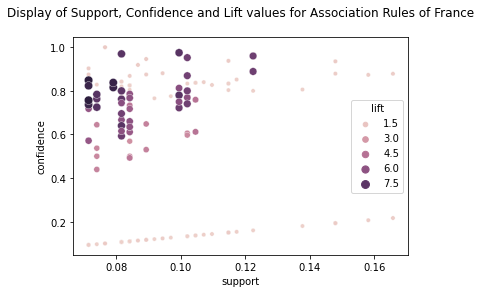

In [37]:
# Visualizing relationship between support, confidence and lift 
sns.scatterplot(x = rules1['support'], y = rules1['confidence'], size = rules1['lift'], hue = rules1['lift'])
plt.title('Display of Support, Confidence and Lift values for Association Rules of France\n')
plt.show()

In [23]:
# filtering rules having high strength using higher lift and confidence value
high_strength_rules_france = rules1[(rules1['lift'] >= 6) & (rules1['confidence'] >= 0.8)]
high_strength_rules_france

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
74,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
76,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
77,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
78,"(ALARM CLOCK BAKELIKE GREEN, POSTAGE)",(ALARM CLOCK BAKELIKE RED),0.084184,0.094388,0.071429,0.848485,8.989353,0.063483,5.977041
80,"(POSTAGE, ALARM CLOCK BAKELIKE RED)",(ALARM CLOCK BAKELIKE GREEN),0.086735,0.096939,0.071429,0.823529,8.495356,0.063021,5.117347
114,"(SET/6 RED SPOTTY PAPER CUPS, POSTAGE)",(SET/6 RED SPOTTY PAPER PLATES),0.117347,0.127551,0.102041,0.869565,6.817391,0.087073,6.688776
115,"(SET/6 RED SPOTTY PAPER PLATES, POSTAGE)",(SET/6 RED SPOTTY PAPER CUPS),0.107143,0.137755,0.102041,0.952381,6.913580,0.087281,18.107143
119,(SET/6 RED SPOTTY PAPER PLATES),"(SET/6 RED SPOTTY PAPER CUPS, POSTAGE)",0.127551,0.117347,0.102041,0.800000,6.817391,0.087073,4.413265


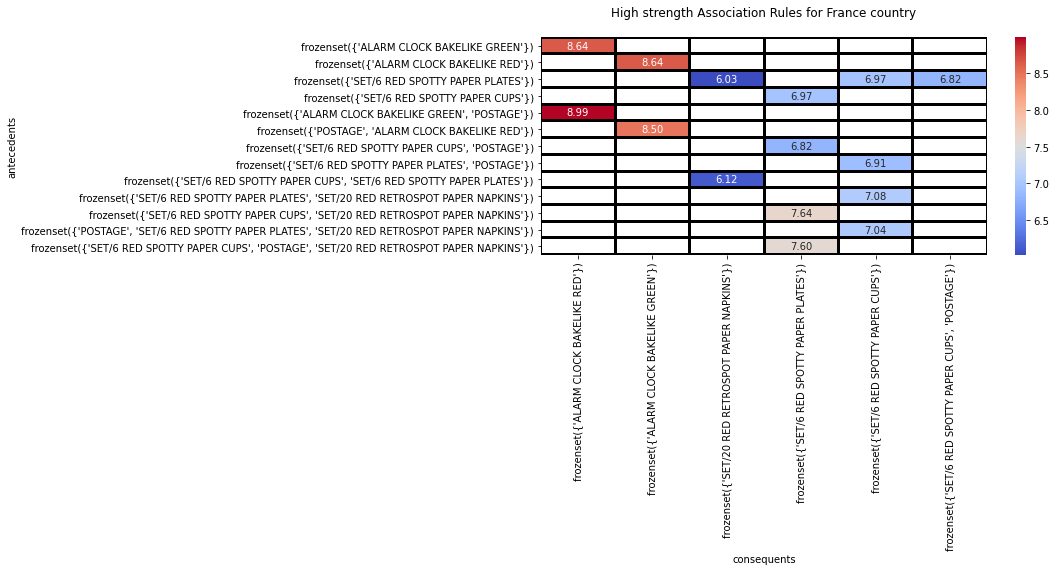

In [48]:
# Visulaizing rules using heatmap
pivot = high_strength_rules_france.pivot(index = 'antecedents', columns = 'consequents', values = 'lift')

plt.figure(figsize = (10,4))
sns.heatmap(pivot, annot = True, fmt = '.2f', linewidths = 2, linecolor='Black', cmap = 'coolwarm')
plt.title('High strength Association Rules for France country\n')
plt.show()

###### Further Anlysis

- We can use these high strength association rules to drive sales of one product using the popularity of other product.
- We can give discounts or promotional offers on group of associated products.
- We can use combination of associated products to form and sell third product.

In [25]:
print('Sells of ALARM CLOCK BAKELIKE RED = ', basket1['ALARM CLOCK BAKELIKE RED'].sum())
print('Sells of ALARM CLOCK BAKELIKE GREEN = ', basket1['ALARM CLOCK BAKELIKE GREEN'].sum())

Sells of ALARM CLOCK BAKELIKE RED =  316
Sells of ALARM CLOCK BAKELIKE GREEN =  340


For eg, we can increase the sales of Red alarm clock bakelike using the popularity of green one by giving promotional discounts on the combination sell of both.

###### Analyzing Association Rules for Germany Country

In [28]:
# Forming dataframe with each transaction in 1 row
basket2 = pd.pivot_table(data = retail[retail['Country'] == 'Germany'], values = 'Quantity', index = 'InvoiceNo', 
                         columns = 'Description', aggfunc = sum, fill_value = 0, dropna = False)
basket2.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# One Hot encoded basket
basket_freq_itemsets_germany = basket2.applymap(encode)
basket_freq_itemsets_germany.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Frequent Itemsets using Apriori Algorithm
freq_itemsets_germany = apriori(df = basket_freq_itemsets_germany, min_support = 0.07, use_colnames = True)
freq_itemsets_germany.head()

,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.072210,(GUMBALL COAT RACK)
3,0.091904,(JAM MAKING SET PRINTED)
4,0.078775,(JUMBO BAG RED RETROSPOT)


In [34]:
# Association rules of frequent Itemsets
rules2 = association_rules(df = freq_itemsets_germany, metric = 'lift', min_threshold = 1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6 RIBBONS RUSTIC CHARM),(POSTAGE),0.102845,0.818381,0.091904,0.893617,1.091933,0.007738,1.707221
1,(POSTAGE),(6 RIBBONS RUSTIC CHARM),0.818381,0.102845,0.091904,0.112299,1.091933,0.007738,1.010651
2,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.100656,0.818381,0.087527,0.869565,1.062544,0.005152,1.392414
3,(POSTAGE),(JUMBO BAG WOODLAND ANIMALS),0.818381,0.100656,0.087527,0.106952,1.062544,0.005152,1.007049
4,(PLASTERS IN TIN CIRCUS PARADE),(POSTAGE),0.115974,0.818381,0.100656,0.867925,1.060539,0.005746,1.375117
5,(POSTAGE),(PLASTERS IN TIN CIRCUS PARADE),0.818381,0.115974,0.100656,0.122995,1.060539,0.005746,1.008006
6,(PLASTERS IN TIN SPACEBOY),(POSTAGE),0.107221,0.818381,0.100656,0.938776,1.147113,0.012909,2.966448
7,(POSTAGE),(PLASTERS IN TIN SPACEBOY),0.818381,0.107221,0.100656,0.122995,1.147113,0.012909,1.017986
8,(POSTAGE),(PLASTERS IN TIN WOODLAND ANIMALS),0.818381,0.137856,0.118162,0.144385,1.047364,0.005344,1.007631
9,(PLASTERS IN TIN WOODLAND ANIMALS),(POSTAGE),0.137856,0.818381,0.118162,0.857143,1.047364,0.005344,1.271335


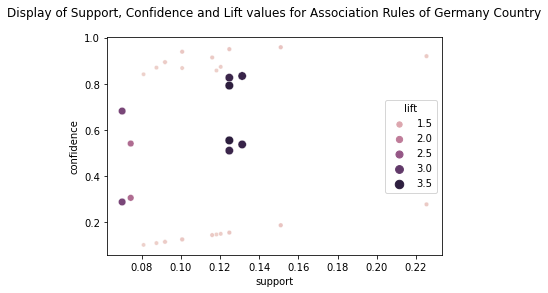

In [40]:
# Visulaizing support, confidence and lift values for association rules of germany country
sns.scatterplot(x = rules2['support'], y = rules2['confidence'], hue = rules2['lift'], size = rules2['lift'])
plt.title('Display of Support, Confidence and Lift values for Association Rules of Germany Country\n')
plt.show()

In [45]:
# High strength rules of Germany country having lift values >= 3 and confidence values >= 50 %
high_strength_rules2 = rules2[(rules2['lift'] >= 3) & (rules2['confidence'] >= 0.5)]
high_strength_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509
25,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
28,"(ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE)",(ROUND SNACK BOXES SET OF 4 FRUITS),0.225383,0.157549,0.124726,0.553398,3.512540,0.089218,1.886357
30,"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS)",(ROUND SNACK BOXES SET OF4 WOODLAND),0.150985,0.245077,0.124726,0.826087,3.370730,0.087724,4.340810
31,(ROUND SNACK BOXES SET OF4 WOODLAND),"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS)",0.245077,0.150985,0.124726,0.508929,3.370730,0.087724,1.728904
33,(ROUND SNACK BOXES SET OF 4 FRUITS),"(ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE)",0.157549,0.225383,0.124726,0.791667,3.512540,0.089218,3.718162


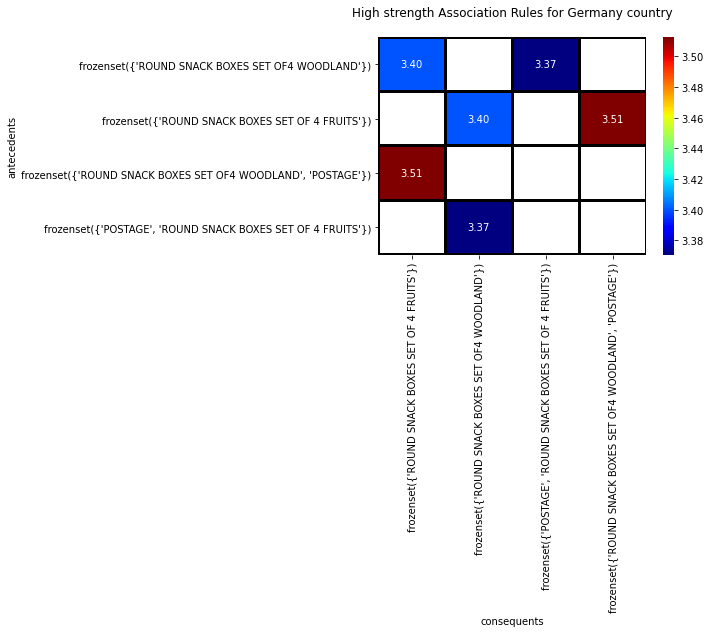

In [46]:
# Visualizing high strength rules using heatmap

pivot2 = high_strength_rules2.pivot(index = 'antecedents', columns = 'consequents', values = 'lift')

sns.heatmap(pivot2, annot = True, fmt = '.2f', linewidths = 2, linecolor = 'black', cmap = 'jet')
plt.title('High strength Association Rules for Germany country\n')
plt.show()

###### Further Anlysis of association rules of Germany Country
- We can use these high strength association rules to drive sales of one product using the popularity of other product.
- We can give discounts or promotional offers on group of associated products.
- We can use combination of associated products to form and sell third product

In [51]:
print('Sells of ROUND SNACK BOXES SET OF 4 WOODLAND = ', basket1['ROUND SNACK BOXES SET OF4 WOODLAND'].sum())
print('Sells of ROUND SNACK BOXES SET OF 4 FRUITS = ', basket1['ROUND SNACK BOXES SET OF 4 FRUITS'].sum())

Sells of ROUND SNACK BOXES SET OF 4 WOODLAND =  636
Sells of ROUND SNACK BOXES SET OF 4 FRUITS =  333


For eg, we can increase the sales of round snack boxes set of 4 fruits using the popularity of woodland one by giving promotional discounts on the combination sell of both.